# PH1978L Final Group Project
Authors: Chiu-Feng Yap, Allison Shay, Joy Yoo

Given a dataset of demographic, lifestyle, social and school related attributes of students, **predict student performance (G3)- (final grade; numeric from 0 to 20)**.

**Three scenarios of predictions will be considered:**
* 1- Classification with two levels (pass/fail)
* 2- Classification with five levels (from I - excellent to V - insufficient)
* 3- Regression, with a numeric output that ranges between 0 and 20

Should include comparison between different machine-learning models (one of which must be linear, and at least 2 non-linear models).

Consider different scenarios where we exclude G1 and G2 variables from our models.

In [81]:
# import libraries we will be using:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency, boxcox
%matplotlib inline
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Adjust notebook settings to widen the notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:85% !important;}</style>"))
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [55]:
# read in the data
df = pd.read_csv("./Data/school_grades_dataset.csv")

# Scenario 1 -  Classification with two levels (pass/fail);

In [ ]:
df1 = df

In [ ]:
# create two level categorical variable for classification with two levels (pass/fail)
# create a list of our conditions
conditions = [
    (df['G3'] <= 10),
    (df['G3'] > 10)
    ]

# create a list of the values we want to assign for each condition
values = ['fail', 'pass' ]

# create a new column and use np.select to assign values to it using our lists as arguments
df1['G3_pass_fail'] = np.select(conditions, values)

In [ ]:
df1.head(10)

In [ ]:
df1.describe()

In [ ]:
df1.dtypes

In [ ]:
X = df1.drop(['G3', 'G3_pass_fail'], axis=1) # exclude independent variables
y = df1['G3_pass_fail']  # only include dependent variable data

# Scenario 2 -  Classification with five levels (from I - excellent to V - insufficient)

In [ ]:
df2 = df

In [ ]:
# create five level categorical variable for classification with five levels (from I - excellent to V - insufficient); and
conditions = [
    (df['G3'] <= 4),
    (df['G3'] > 4) & (df['G3'] <=8),
    (df['G3'] > 8) & (df['G3'] <=12),
    (df['G3'] > 12) & (df['G3'] <=16),
    (df['G3'] > 16)
    ]

# create a list of the values we want to assign for each condition
values = ['I', 'II', 'III', 'IV', 'V' ]

# create a new column and use np.select to assign values to it using our lists as arguments
df2['G3_five_level'] = np.select(conditions, values)

In [ ]:
X = df2.drop(['G3', 'G3_five_level'], axis=1) # exclude independent variables
y = df2['G3_five_level']  # only include dependent variable data

# Scenario 3 - Regression, with a numeric output that ranges between 0 and 20.

In [56]:
df3 = df

In [58]:
df3.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [59]:
df3.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [60]:
# credit: https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction. 
# One of the best notebooks on getting started with a ML problem.

def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [61]:
# let's take a look at missingness
df3_missing = missing_values_table(df3)
df3_missing

Your selected dataframe has 33 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


### Create Dummy Variables for Categorical Variables

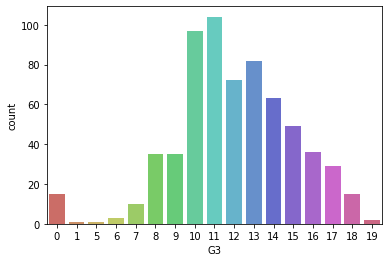

In [62]:
#creating a countplot to show the distribution of G3
sns.countplot(x='G3', data=df3, palette='hls')
plt.show()

Text(0, 0.5, 'Frequency')

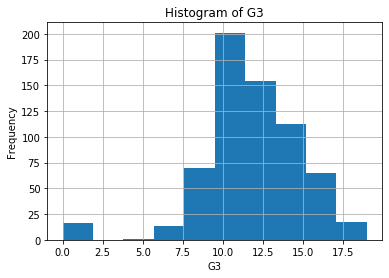

In [63]:
df3.G3.hist()
plt.title('Histogram of G3')
plt.xlabel('G3')
plt.ylabel('Frequency')

Steph: It looks slightly skewed to me. What do you guys think? We might want to transform G3 to make it less skewed, possibly a log transformation? 

### Feature Transformation

In [64]:
df3.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
age,0.416795,0.071509
Medu,-0.029950,-1.260619
Fedu,0.215343,-1.109241
traveltime,1.247648,1.108865
studytime,0.699619,0.037846
failures,3.092699,9.824409
famrel,-1.105934,1.348973
freetime,-0.181277,-0.396959
goout,-0.008580,-0.865454
Dalc,2.141913,4.349297


A rule of thumb, skewness can be interpreted like this:

* Fairly symmetrical = -0.5 to 0.5
* Moderately skewed= -0.5 to -1.0 and 0.5 to 1.0
* Highly skewed = <-1.0 and >1.0

From the table above, it seems like **traveltime**, **failures**, **famrel**, **Dalc**, and **absences** are highly skewed and **studytime**, **Walc**, and **G3** are moderately skewed. Let's take a look at their histogram

Text(0, 0.5, 'Frequency')

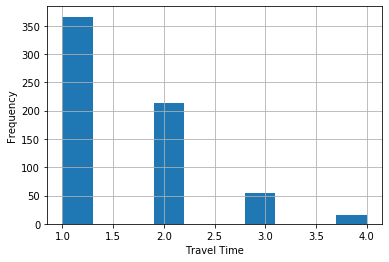

In [65]:
df3.traveltime.hist()
plt.xlabel('Travel Time')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

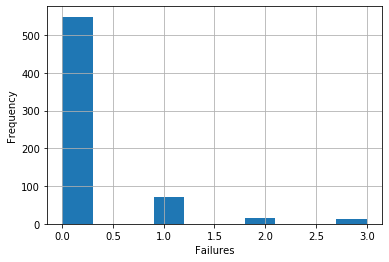

In [66]:
df3.failures.hist()
plt.xlabel('Failures')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

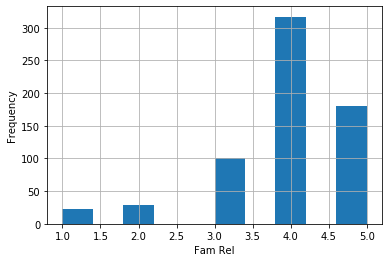

In [67]:
df3.famrel.hist()
plt.xlabel('Fam Rel')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

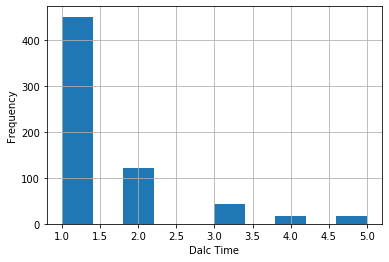

In [68]:
df3.Dalc.hist()
plt.xlabel('Dalc Time')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

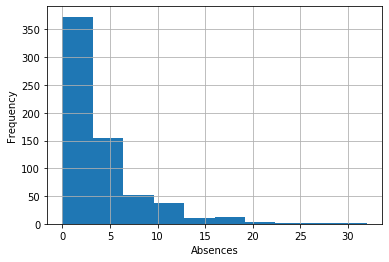

In [69]:
df3.absences.hist()
plt.xlabel('Absences')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

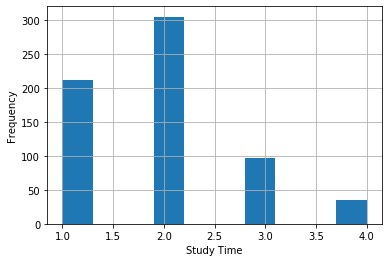

In [70]:
df3.studytime.hist()
plt.xlabel('Study Time')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

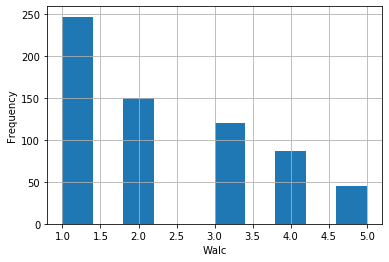

In [71]:
df3.Walc.hist()
plt.xlabel('Walc')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

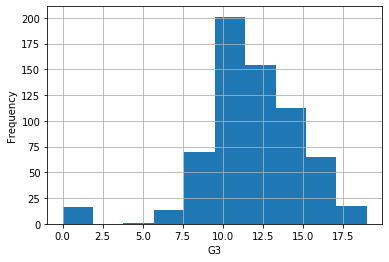

In [72]:
df3.G3.hist()
plt.xlabel('G3')
plt.ylabel('Frequency')

In [102]:
np.seterr(divide='ignore')

# tried log, reciprocal, sqrt transformations and picked the best.
df3['recip_traveltime'] = 1/df3['traveltime']
df3['sqrt_failures'] = df3['failures']**(0.5)
df3['sqr_famrel'] = df3['famrel']**2
df3['recip_Dalc'] = 1/df3['Dalc']
df3['sqrt_absences'] = df3['absences']**(0.5)
df3['sqrt_studytime'] = df3['studytime']**(0.5)
df3['log_Walc'] = np.log(df3['Walc'])
df3['sqr_G3'] = df3['G3']**2

df3['cube_rt_failures'] = df3['failures']**(1/3) # still skewed, need to try normalization
df3['cube_rt_Dalc'] = df3['Dalc']**(1/3) # still skewed, need to try normalization

# need to find better transformation for failures, and Dalc

In [103]:
df3.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
age,0.416795,0.071509
Medu,-0.029950,-1.260619
Fedu,0.215343,-1.109241
traveltime,1.247648,1.108865
studytime,0.699619,0.037846
failures,3.092699,9.824409
famrel,-1.105934,1.348973
freetime,-0.181277,-0.396959
goout,-0.008580,-0.865454
Dalc,2.141913,4.349297


#### Machine Learning for Scenario 3

In [ ]:
X = df3.drop(['G3'], axis=1) # exclude independent variables and variables that have been transformed
y = df3['G3']  # only include dependent variable data

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# standardization